# Exploratory Data Analysis (EDA)

# Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
df=pd.read_csv("D:/Downloads/archive (21)/haberman.csv",header=0)
df.columns=['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
df


,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# Data understanding

In [3]:
df.shape

(305, 4)

In [4]:
df['survival_status'].value_counts()

survival_status
1    224
2     81
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
#output shows all integer non null values

In [7]:
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
df

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
...,...,...,...,...
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no


In [8]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# Class-wise statistical analysis

In [9]:
survival_yes=df[df['survival_status']=='yes']
survival_yes.describe()

,patient_age,operation_year,positive_axillary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [10]:
survival_no=df[df['survival_status']=='no']
survival_no.describe()

,patient_age,operation_year,positive_axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# 3. Uni-variate data analysis

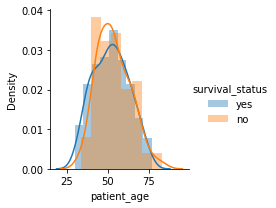

<Figure size 1080x576 with 0 Axes>

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    sns.FacetGrid(df,hue="survival_status").map(sns.distplot,"patient_age").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

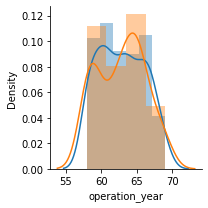

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "operation_year")
    plt.show()

# Number of positive axillary nods

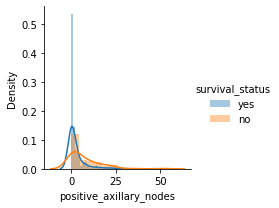

<Figure size 864x432 with 0 Axes>

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    g = sns.FacetGrid(df, hue="survival_status")
    g.map(sns.distplot, "positive_axillary_nodes", kde=True)
    g.add_legend()
    plt.figure(figsize=(12,6))
    plt.show()


# Box plot

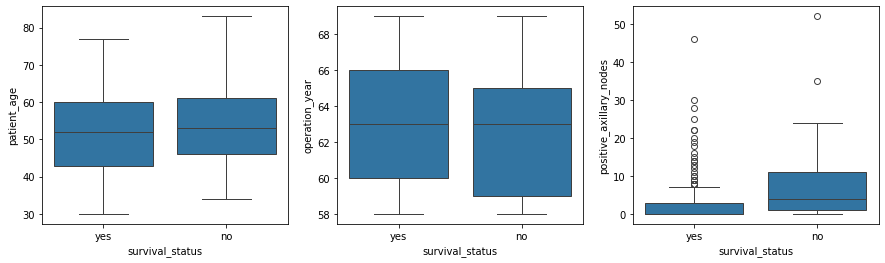

In [14]:
plt.figure(figsize = (15, 4)) 
plt.subplot(1,3,1) 
sns.boxplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status', y = 'operation_year', data = df) 
plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df) 
plt.show()

# Violin plot

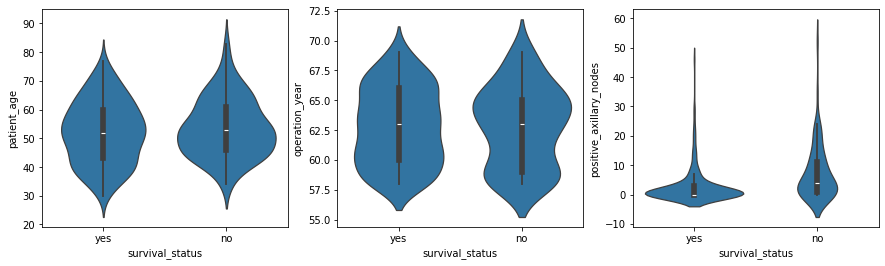

In [15]:
plt.figure(figsize = (15, 4)) 
plt.subplot(1,3,1) 
sns.violinplot(x = 'survival_status', y = 'patient_age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'survival_status', y = 'operation_year', data = df) 
plt.subplot(1,3,3)
sns.violinplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df) 
plt.show()

# Bi-variate data analysis

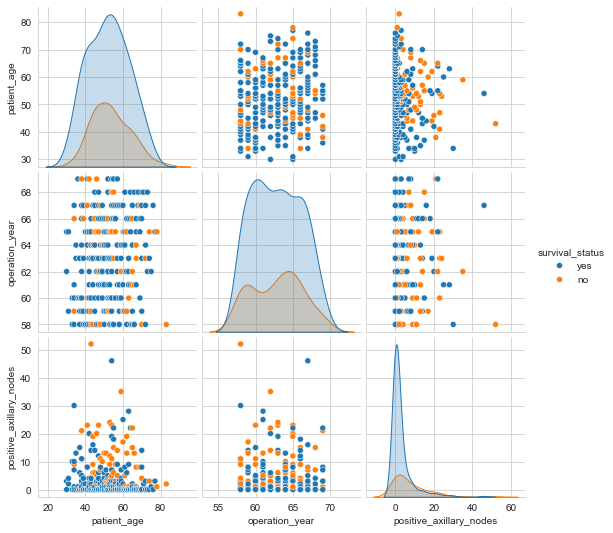

In [16]:
#pair plot
sns.set_style('whitegrid')
sns.pairplot(df,hue='survival_status')
plt.show()

# Joint plot

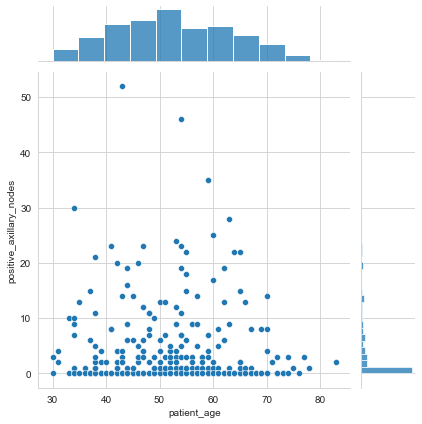

In [17]:
sns.jointplot(x="patient_age",y="positive_axillary_nodes",data=df)
plt.show()

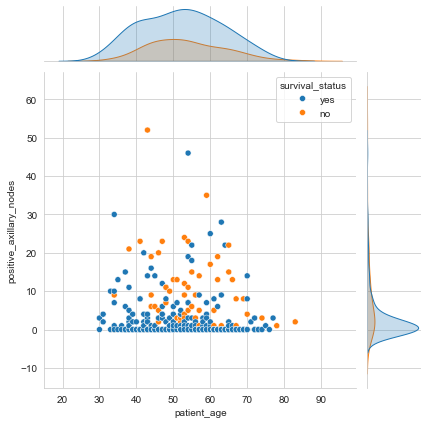

In [18]:
sns.jointplot(x="patient_age",y="positive_axillary_nodes",data=df,hue="survival_status")
plt.show()

# Heatmap

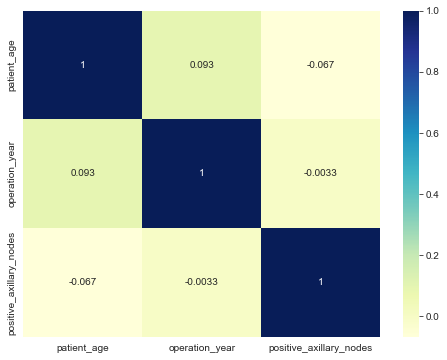

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:,0:3].corr(), cmap="YlGnBu",annot=True)
plt.show()

# Multivariate analysis

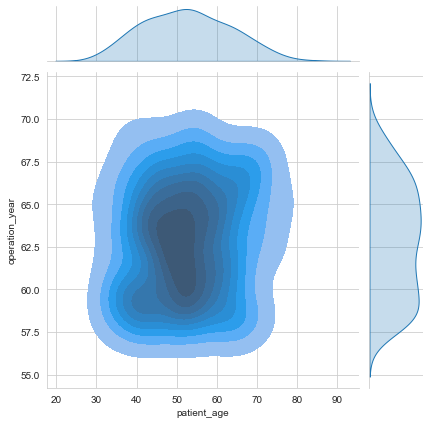

In [20]:
sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
plt.show()